In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
#daily top 10 키워드 추출
import requests, json
from urllib import parse
import pandas as pd
from pandas.io.json import json_normalize
import json

url = "http://tools.kinds.or.kr:8888/query_rank"
api_key_utf8 = "526a56bd-8033-4ab2-8587-c5f3b4ef47f8"
api_key_decode = requests.utils.unquote(api_key_utf8, encoding='utf-8')
params = {
   "access_key": "526a56bd-8033-4ab2-8587-c5f3b4ef47f8",
    "argument": {
        "from": "2021-10-01",
        "until": "2021-10-01",
        "offset": 10,
        "target_access_key": ""
    }
}

response = requests.post(url, data=json.dumps(params))
json_object = json.loads(response.text)

json_object

{'result': 0,
 'return_object': {'queries': [{'date': '20211001',
    'query': '이재명',
    'count': 1085},
   {'date': '20211001', 'query': 'mrna', 'count': 783},
   {'date': '20211001', 'query': '국책사업', 'count': 782},
   {'date': '20211001', 'query': '국책과제', 'count': 779},
   {'date': '20211001', 'query': '매각', 'count': 776},
   {'date': '20211001', 'query': '윤석열', 'count': 773},
   {'date': '20211001', 'query': '김동연', 'count': 772},
   {'date': '20211001', 'query': '디지털화폐', 'count': 772},
   {'date': '20211001', 'query': '소형원전', 'count': 772},
   {'date': '20211001', 'query': '애플카', 'count': 771}]}}

In [3]:
#daily top 3 키워드 추출
daily_first = json_object['return_object']['queries'][0]['query']
daily_second = json_object['return_object']['queries'][1]['query']
daily_third = json_object['return_object']['queries'][2]['query']

print(daily_first)
print(daily_second)
print(daily_third)

이재명
mrna
국책사업


In [19]:
#메인 키워드의 연관 키워드 추출
import requests, json
from urllib import parse
import pandas as pd
url = "http://tools.kinds.or.kr:8888/word_cloud"
api_key_utf8 = "526a56bd-8033-4ab2-8587-c5f3b4ef47f8"
api_key_decode = requests.utils.unquote(api_key_utf8, encoding='utf-8')
params = {
    "access_key": "526a56bd-8033-4ab2-8587-c5f3b4ef47f8",
    "argument": {
        "query": daily_first,
        "published_at": {
            "from": "2021-09-30",
            "until": "2021-10-01"
        }
    }
}

response_first = requests.post(url, data=json.dumps(params))
json_object_relate_first = json.loads(response_first.text)
json_object_relate_first

{'result': 0,
 'return_object': {'nodes': [{'id': 2,
    'name': '이낙연',
    'level': 1,
    'weight': 55.18},
   {'id': 3, 'name': '대장동 의혹', 'level': 3, 'weight': 53.86},
   {'id': 4, 'name': '민주당', 'level': 3, 'weight': 43.32},
   {'id': 5, 'name': '윤석열', 'level': 3, 'weight': 43.12},
   {'id': 6, 'name': '더불어민주당', 'level': 3, 'weight': 25.05},
   {'id': 7, 'name': '추미애', 'level': 3, 'weight': 17.96},
   {'id': 8, 'name': '이준석 국민', 'level': 1, 'weight': 26.35},
   {'id': 9, 'name': '화천대유', 'level': 3, 'weight': 24.67},
   {'id': 10, 'name': '변학도', 'level': 3, 'weight': 20.55},
   {'id': 11, 'name': '이준석 대표', 'level': 3, 'weight': 17.25},
   {'id': 13, 'name': '유동규', 'level': 1, 'weight': 23.84},
   {'id': 14, 'name': '성남도시개발공사 기획본부장', 'level': 3, 'weight': 16.06},
   {'id': 15, 'name': '핵심 인물', 'level': 3, 'weight': 9.74},
   {'id': 16, 'name': '최측근', 'level': 3, 'weight': 7.73},
   {'id': 17, 'name': '검찰총장', 'level': 2, 'weight': 22.79},
   {'id': 18, 'name': '홍준표', 'level': 3, 'weig

In [12]:
url = "http://tools.kinds.or.kr:8888/word_cloud"
api_key_utf8 = "526a56bd-8033-4ab2-8587-c5f3b4ef47f8"
api_key_decode = requests.utils.unquote(api_key_utf8, encoding='utf-8')
params = {
    "access_key": "526a56bd-8033-4ab2-8587-c5f3b4ef47f8",
    "argument": {
        "query": daily_second,
        "published_at": {
            "from": "2021-09-30",
            "until": "2021-10-01"
        }
    }
}

response_second = requests.post(url, data=json.dumps(params))
json_object_relate_second = json.loads(response_second.text)
json_object_relate_second

{'result': 0,
 'return_object': {'nodes': [{'id': 2,
    'name': '모더',
    'level': 1,
    'weight': 10.96},
   {'id': 3, 'name': '화이자', 'level': 3, 'weight': 5.33},
   {'id': 4, 'name': '코로나19 백신', 'level': 3, 'weight': 4.63},
   {'id': 5, 'name': '리보핵산', 'level': 3, 'weight': 4.0},
   {'id': 6, 'name': '코로나19 치료제', 'level': 3, 'weight': 3.0},
   {'id': 7, 'name': '코로나', 'level': 3, 'weight': 1.71},
   {'id': 8, 'name': '치료제', 'level': 3, 'weight': 1.5},
   {'id': 9, 'name': '메신저 리보핵산', 'level': 1, 'weight': 4.0},
   {'id': 10, 'name': '상용화', 'level': 3, 'weight': 1.33},
   {'id': 11, 'name': '단백질', 'level': 2, 'weight': 3.81},
   {'id': 12, 'name': '유전 암호', 'level': 3, 'weight': 3.11},
   {'id': 13, 'name': '유전 정보', 'level': 3, 'weight': 2.73},
   {'id': 14, 'name': '리보솜', 'level': 3, 'weight': 2.4},
   {'id': 15, 'name': '기본구조', 'level': 3, 'weight': 2.18},
   {'id': 16, 'name': '루게릭병', 'level': 3, 'weight': 2.0},
   {'id': 17, 'name': '염기서열', 'level': 3, 'weight': 2.0},
   {'id': 1

In [13]:
url = "http://tools.kinds.or.kr:8888/word_cloud"
api_key_utf8 = "526a56bd-8033-4ab2-8587-c5f3b4ef47f8"
api_key_decode = requests.utils.unquote(api_key_utf8, encoding='utf-8')
params = {
    "access_key": "526a56bd-8033-4ab2-8587-c5f3b4ef47f8",
    "argument": {
        "query": daily_third,
        "published_at": {
            "from": "2021-09-30",
            "until": "2021-10-01"
        }
    }
}

response_third = requests.post(url, data=json.dumps(params))
json_object_relate_third = json.loads(response_third.text)
json_object_relate_third

{'result': 0,
 'return_object': {'nodes': [{'id': 2,
    'name': '영동군',
    'level': 1,
    'weight': 2.4},
   {'id': 3, 'name': '극대화', 'level': 3, 'weight': 2.0},
   {'id': 4, 'name': '주변지역개발 밑그림', 'level': 3, 'weight': 2.0},
   {'id': 5, 'name': '영동양수발전소', 'level': 3, 'weight': 1.2},
   {'id': 6, 'name': '용역 최종보고회', 'level': 3, 'weight': 1.0},
   {'id': 7, 'name': '주변지역개발기본계획', 'level': 3, 'weight': 0.67},
   {'id': 8, 'name': '대의일반산단', 'level': 2, 'weight': 2.0},
   {'id': 9, 'name': '의령', 'level': 3, 'weight': 1.71},
   {'id': 10, 'name': '첨단 제조', 'level': 3, 'weight': 1.33},
   {'id': 11, 'name': '고속국도', 'level': 3, 'weight': 1.0},
   {'id': 12, 'name': '울산', 'level': 3, 'weight': 1.0},
   {'id': 13, 'name': '의령sim', 'level': 3, 'weight': 0.67},
   {'id': 14, 'name': '조성중', 'level': 3, 'weight': 0.67},
   {'id': 15, 'name': '국토교통부', 'level': 2, 'weight': 1.0},
   {'id': 16, 'name': '양수발전소 주변', 'level': 2, 'weight': 1.0},
   {'id': 17, 'name': '군의회', 'level': 3, 'weight': 0.8},
   

In [ ]:
from pandas.io.json import json_normalize
import json

#데이터 프레임 변환
df_relate = pd.json_normalize(json_object_relate['return_object']['nodes'])

#메인 키워드 추가
df_relate_weight = df_relate.sort_values(by=['weight'],axis=0,ascending=False)
daily_first_weight = float(df_relate_weight['weight'][0])+100
df_relate_append = df_relate.append({'id': 0,
                  'name': daily_first,
                  'level': 0,
                  'weight': daily_first_weight} , ignore_index=True)

In [37]:
df_relate1 = pd.json_normalize(json_object_relate_first['return_object']['nodes'])
df_relate_weight1 = df_relate1.sort_values(by=['weight'],axis=0,ascending=False)
daily_first_weight = float(df_relate_weight1['weight'][0])+100
df_relate1_append = df_relate1.append({'id': 0,
                  'name': daily_first,
                  'level': 0,
                  'weight': daily_first_weight1} , ignore_index=True)

df_relate1_append = df_relate1_append.sort_values(by=['weight'],axis=0,ascending=False)
df_relate1_append = df_relate1_append.iloc[:4]

df_relate2 = pd.json_normalize(json_object_relate_second['return_object']['nodes'])
df_relate_weight2 = df_relate2.sort_values(by=['weight'],axis=0,ascending=False)
daily_second_weight = float(df_relate_weight2['weight'][0])+100
df_relate2_append = df_relate2.append({'id': 0,
                  'name': daily_second,
                  'level': 0,
                  'weight': daily_second_weight} , ignore_index=True)

df_relate2_append = df_relate2_append.sort_values(by=['weight'],axis=0,ascending=False)
df_relate2_append = df_relate2_append.iloc[:4]

df_relate3 = pd.json_normalize(json_object_relate_third['return_object']['nodes'])
df_relate_weight3 = df_relate3.sort_values(by=['weight'],axis=0,ascending=False)
daily_third_weight = float(df_relate_weight3['weight'][0])+100
df_relate3_append = df_relate3.append({'id': 0,
                  'name': daily_third,
                  'level': 0,
                  'weight': daily_third_weight} , ignore_index=True)

df_relate3_append = df_relate3_append.sort_values(by=['weight'],axis=0,ascending=False)
df_relate3_append = df_relate3_append.iloc[:4]

print(df_relate1_append)
print(df_relate2_append)
print(df_relate3_append)

    id    name  level  weight
29   0     이재명      0  155.18
0    2     이낙연      1   55.18
1    3  대장동 의혹      3   53.86
2    4     민주당      3   43.32
    id      name  level  weight
30   0      mrna      0  110.96
0    2        모더      1   10.96
1    3       화이자      3    5.33
2    4  코로나19 백신      3    4.63
    id        name  level  weight
30   0        국책사업      0   102.4
0    2         영동군      1     2.4
2    4  주변지역개발 밑그림      3     2.0
6    8      대의일반산단      2     2.0


In [38]:
df = pd.concat([df_relate1_append,df_relate2_append,df_relate3_append])
df

,id,name,level,weight
29,0,이재명,0,155.18
0,2,이낙연,1,55.18
1,3,대장동 의혹,3,53.86
2,4,민주당,3,43.32
30,0,mrna,0,110.96
0,2,모더,1,10.96
1,3,화이자,3,5.33
2,4,코로나19 백신,3,4.63
30,0,국책사업,0,102.40
0,2,영동군,1,2.40


In [51]:
first_keyword = df['name'][:4].values.tolist()
second_keyword = df['name'][4:8].values.tolist()
third_keyword = df['name'][8:].values.tolist()
print(first_keyword)
print(second_keyword)
print(third_keyword)

['이재명', '이낙연', '대장동 의혹', '민주당']
['mrna', '모더', '화이자', '코로나19 백신']
['국책사업', '영동군', '주변지역개발 밑그림', '대의일반산단']


In [39]:
#워드클라우드 위해 dict로 변환
data = dict(zip(df['name'].tolist(), 
                df['weight'].tolist()))
data

{'이재명': 155.18,
 '이낙연': 55.18,
 '대장동 의혹': 53.86,
 '민주당': 43.32,
 'mrna': 110.96000000000001,
 '모더': 10.96,
 '화이자': 5.33,
 '코로나19 백신': 4.63,
 '국책사업': 102.4,
 '영동군': 2.4,
 '주변지역개발 밑그림': 2.0,
 '대의일반산단': 2.0}

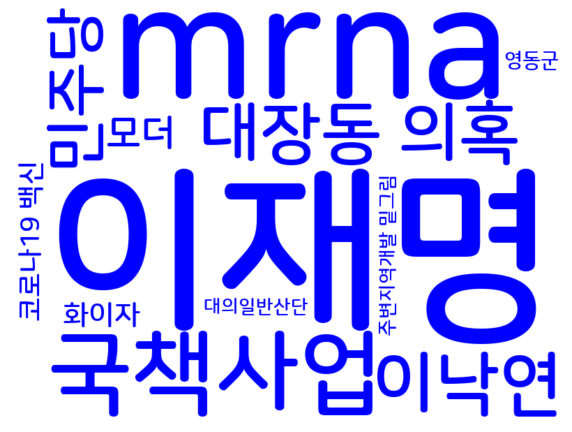

In [41]:
#워드클라우드 실행
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(font_path = 'NanumSquareRoundB.TTF',
               background_color='white',                              #배경색
               width=800, height=600 ,                                #사이즈설정
               max_words=20,
              color_func=lambda *args, **kwargs: "blue")                                         #단어갯수
cloud = wc.generate_from_frequencies(data)                            #사전형태 데이터

plt.figure(figsize=(10,10))                                           #액자사이즈설정
plt.axis('off')                                                       #테두리 선 없애기
plt.imshow(cloud,interpolation="bilinear")

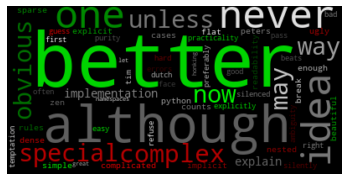

In [9]:
# WordCloud 공식 document에서 키워드별 색 지정 방식 코드 가져옴
from wordcloud import (WordCloud, get_single_color_func)
import matplotlib.pyplot as plt


class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)


class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.

       Uses wordcloud.get_single_color_func

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)


text = """The Zen of Python, by Tim Peters
Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!"""

# Since the text is small collocations are turned off and text is lower-cased
wc = WordCloud(collocations=False).generate(text.lower())

color_to_words = {
    # words below will be colored with a green single color function
    '#00ff00': ['beautiful', 'explicit', 'simple', 'sparse',
                'readability', 'rules', 'practicality',
                'explicitly', 'one', 'now', 'easy', 'obvious', 'better'],
    # will be colored with a red single color function
    'red': ['ugly', 'implicit', 'complex', 'complicated', 'nested',
            'dense', 'special', 'errors', 'silently', 'ambiguity',
            'guess', 'hard']
}

# Words that are not in any of the color_to_words values
# will be colored with a grey single color function
default_color = 'grey'

# Create a color function with single tone
# grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)

# Create a color function with multiple tones
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

# Apply our color function
wc.recolor(color_func=grouped_color_func)

# Plot
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

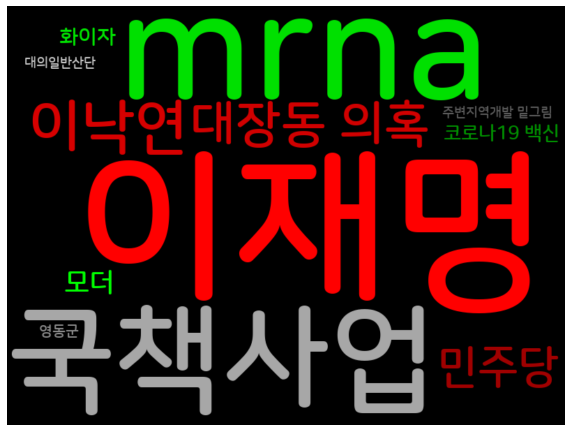

In [56]:
from wordcloud import (WordCloud, get_single_color_func)
import matplotlib.pyplot as plt


class SimpleGroupedColorFunc(object):
    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)


class GroupedColorFunc(object):
    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)
    
wc = WordCloud(font_path = 'NanumSquareRoundB.TTF',
               background_color='black',                              #배경색
               width=800, height=600)                                 
wc = wc.generate_from_frequencies(data)                    


color_to_words = {
    # words below will be colored with a green single color function
    'red': first_keyword,
    # will be colored with a red single color function
    '#00ff00': second_keyword
}

default_color = 'grey'
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

# Apply our color function
wc.recolor(color_func=grouped_color_func)

# Plot
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()